# Exploratory Data Analysis on Global Terrorism

# Objective:-
Terrorism is a threat of violence that creates fear in a population. It is also important to understand that all violent acts are not terrorist acts.

As a security/defense analyst,find out the hot zone of terrorism and derive some security issues and insight by EDA.

# Installation of libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn as sk

In [3]:
df = pd.read_csv(r"C:\Users\Lenovo\EDA\EDA Project\Global Terrorism Data (1).csv",encoding="latin")

C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [6]:
# Number of rows and columns in data set
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 181691
Number of columns: 135


In [7]:
#Number of null values per columns
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [8]:
#To know the number of columns and data type of each columns and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [9]:
#To Know overall mean, median, mode and many such things
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


# Cleaning Unneccessary and Unwanted Column

There are several unnecessary columns, so instead of deleting columns we can just select the columns as per our requirements.
Some column names are unconvinient so we have to rename them also.


In [5]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                   'region_txt':'Region','attacktype1_txt':'AttacksType','target1':'Target',
                  'nkill':'killed','weaptype1_txt':'WeaponType','nwound':'Wounded','summary':'Summary',
                  'gname':'Group','targtype1_txt':'Target_type','motive':'Motive'},inplace=True)

data=df[['Year','Month','Day','Country','Region','AttacksType','city','Target',
       'Motive','killed','WeaponType','Wounded','Summary','Group','Target_type']]

data.head(10)

,Year,Month,Day,Country,Region,AttacksType,city,Target,Motive,killed,WeaponType,Wounded,Summary,Group,Target_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Assassination,Santo Domingo,Julio Guzman,NaN,1.0,Unknown,0.0,NaN,MANO-D,Private Citizens & Property
1,1970,0,0,Mexico,North America,Hostage Taking (Kidnapping),Mexico city,"Nadine Chaval, daughter",NaN,0.0,Unknown,0.0,NaN,23rd of September Communist League,Government (Diplomatic)
2,1970,1,0,Philippines,Southeast Asia,Assassination,Unknown,Employee,NaN,1.0,Unknown,0.0,NaN,Unknown,Journalists & Media
3,1970,1,0,Greece,Western Europe,Bombing/Explosion,Athens,U.S. Embassy,NaN,NaN,Explosives,NaN,NaN,Unknown,Government (Diplomatic)
4,1970,1,0,Japan,East Asia,Facility/Infrastructure Attack,Fukouka,U.S. Consulate,NaN,NaN,Incendiary,NaN,NaN,Unknown,Government (Diplomatic)
5,1970,1,1,United States,North America,Armed Assault,Cairo,Cairo Police Headquarters,To protest the Cairo Illinois Police Deparment,0.0,Firearms,0.0,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police
6,1970,1,2,Uruguay,South America,Assassination,Montevideo,Juan Maria de Lucah/Chief of Directorate of in...,NaN,0.0,Firearms,0.0,NaN,Tupamaros (Uruguay),Police
7,1970,1,2,United States,North America,Bombing/Explosion,Oakland,Edes Substation,NaN,0.0,Explosives,0.0,1/2/1970: Unknown perpetrators detonated explo...,Unknown,Utilities
8,1970,1,2,United States,North America,Facility/Infrastructure Attack,Madison,"R.O.T.C. offices at University of Wisconsin, M...",To protest the War in Vietnam and the draft,0.0,Incendiary,0.0,"1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military
9,1970,1,3,United States,North America,Facility/Infrastructure Attack,Madison,Selective Service Headquarters in Madison Wisc...,To protest the War in Vietnam and the draft,0.0,Incendiary,0.0,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General)


There is no column to know overall causalities so we have to create a column for that and add the 'killed' and 'Wounded' columns

In [6]:
data['Casualities']=data['killed']+data['Wounded']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15012\2613268856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Casualities']=data['killed']+data['Wounded']


In [5]:
data.head()

,Year,Month,Day,Country,Region,AttacksType,Target,Motive,killed,WeaponType,Wounded,Summary,Group,Target_type,Casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Assassination,Julio Guzman,NaN,1.0,Unknown,0.0,NaN,MANO-D,Private Citizens & Property,1.0
1,1970,0,0,Mexico,North America,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",NaN,0.0,Unknown,0.0,NaN,23rd of September Communist League,Government (Diplomatic),0.0
2,1970,1,0,Philippines,Southeast Asia,Assassination,Employee,NaN,1.0,Unknown,0.0,NaN,Unknown,Journalists & Media,1.0
3,1970,1,0,Greece,Western Europe,Bombing/Explosion,U.S. Embassy,NaN,NaN,Explosives,NaN,NaN,Unknown,Government (Diplomatic),NaN
4,1970,1,0,Japan,East Asia,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,Incendiary,NaN,NaN,Unknown,Government (Diplomatic),NaN


In [6]:
data.tail()

,Year,Month,Day,Country,Region,AttacksType,Target,Motive,killed,WeaponType,Wounded,Summary,Group,Target_type,Casualities
181686,2017,12,31,Somalia,Sub-Saharan Africa,Armed Assault,Checkpoint,NaN,1.0,Firearms,2.0,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,3.0
181687,2017,12,31,Syria,Middle East & North Africa,Bombing/Explosion,Hmeymim Air Base,NaN,2.0,Explosives,7.0,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,9.0
181688,2017,12,31,Philippines,Southeast Asia,Facility/Infrastructure Attack,Houses,NaN,0.0,Incendiary,0.0,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,0.0
181689,2017,12,31,India,South Asia,Bombing/Explosion,Office,NaN,0.0,Explosives,0.0,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),0.0
181690,2017,12,31,Philippines,Southeast Asia,Bombing/Explosion,Unknown,NaN,0.0,Explosives,0.0,12/31/2017: An explosive device was discovered...,Unknown,Unknown,0.0


In [7]:
data.duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
181686    False
181687    False
181688    False
181689    False
181690    False
Length: 181691, dtype: bool

# Data Visualisation

<AxesSubplot:xlabel='Year', ylabel='Country'>

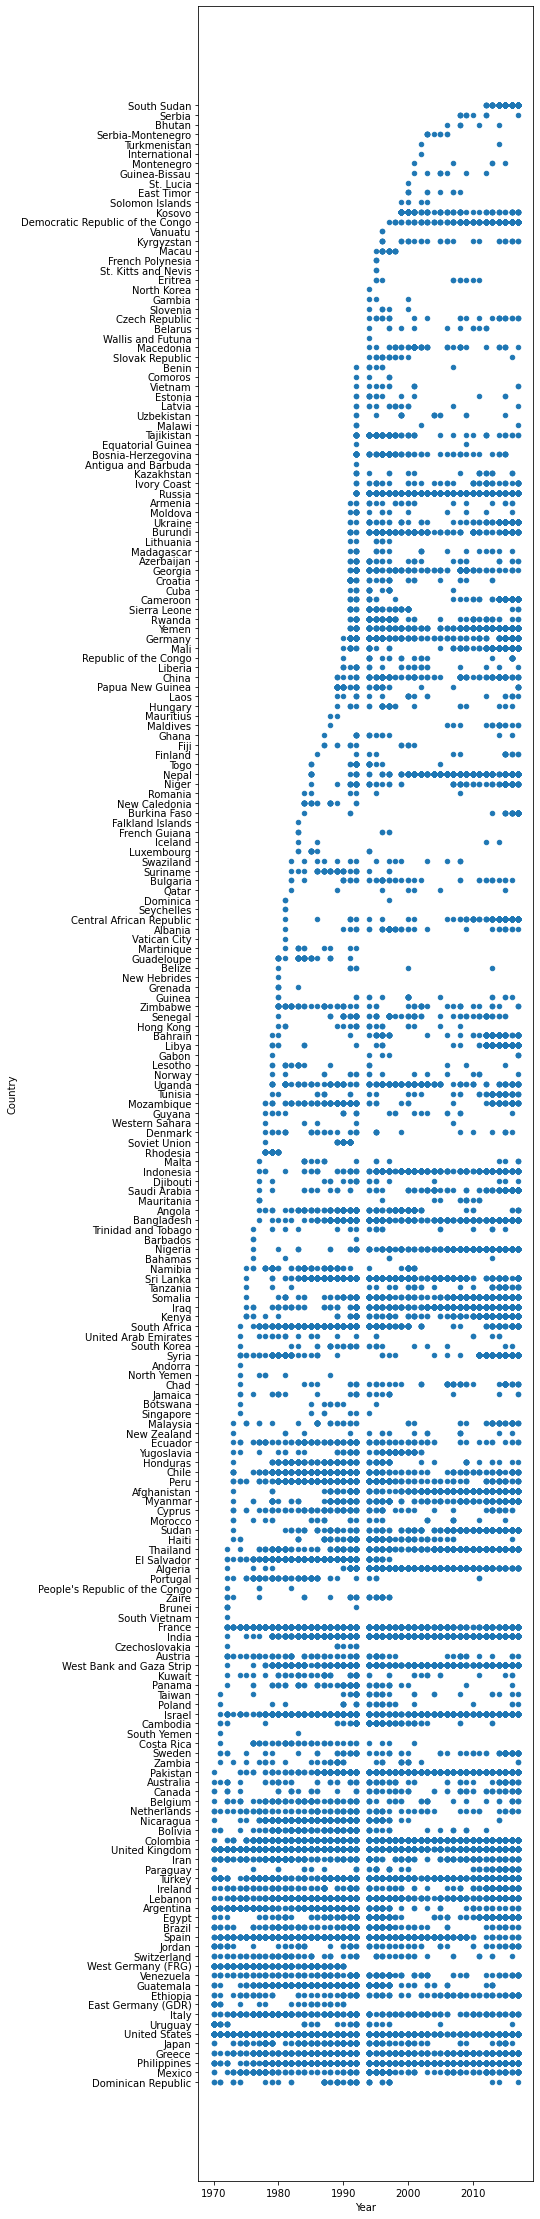

In [14]:
data.plot(kind='scatter',x='Year',y='Country',figsize=(6,40))

from above graph we can conclude one fact that over the year terrorist attacks increases massively

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   AttacksType  181691 non-null  object 
 6   Target       181055 non-null  object 
 7   Motive       50561 non-null   object 
 8   killed       171378 non-null  float64
 9   WeaponType   181691 non-null  object 
 10  Wounded      165380 non-null  float64
 11  Summary      115562 non-null  object 
 12  Group        181691 non-null  object 
 13  Target_type  181691 non-null  object 
 14  Casualities  164817 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 20.8+ MB


In [9]:
#total no. of counts of countries
data['Country'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: Country, Length: 205, dtype: int64

# Which Country has highest terrorist attacks?

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

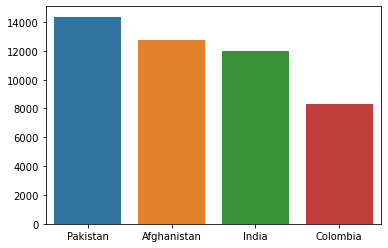

In [10]:
sb.barplot(data['Country'].value_counts()[1:5].index,data['Country'].value_counts()[1:5].values)

# Which city has highest Terrorist Attacks?

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

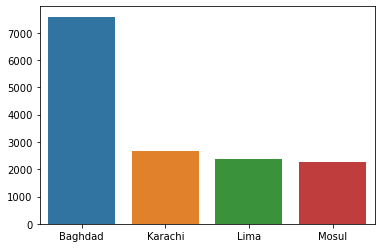

In [6]:
sb.barplot(data['city'].value_counts()[1:5].index,data['city'].value_counts()[1:5].values)

In [8]:
#total no. of people killed
data['killed'].sum()

411868.0

In [11]:
#total no. of casualities
data['Casualities'].sum()

872892.0

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

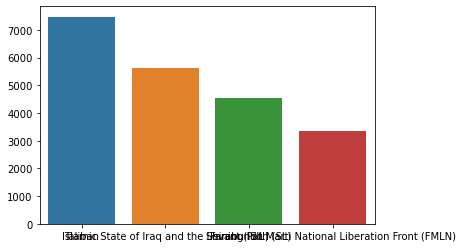

In [14]:
sb.barplot(data['Group'].value_counts()[1:5].index,data['Group'].value_counts()[1:5].values)
sb.barplot(figsize=())
fig.set_size_inches(18,6)